#  Analyse du jeu de données 'insurance' pour regression

In [1]:
#Bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### 1. Chargement du dataset

In [5]:
df = pd.read_csv('insurance.csv')

#### 2. Affichage du nombre d'instances et d'attributs du dataset + l'entete du dataset (les 5 premieres lignes / instances)

In [10]:
print (df.shape)
print (df.head)

(1338, 7)
<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


#### 3. Description du dataset

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 4. Types des valeurs des attributs du dataset

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### 5. Calcul du nombres de valeurs manquantes dans chaque colonne

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

PS : on a aucune valeur manquante dans notre dataset

#### 6. Visualisation des données

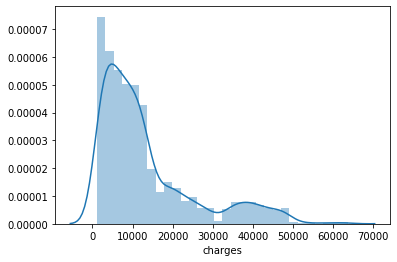

In [16]:
sns.distplot(df["charges"])

PS : D'aprés la figure ci-dessus, nous pouvons en conclure que l'attribut target 'charges' n'a pas une distribution normale mais une distribution mixte.

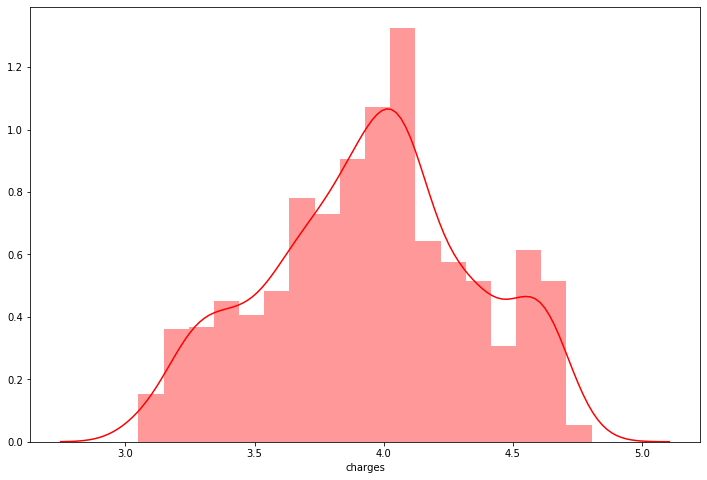

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

PS : Distribution proche de la normale pour l'attribut target 'charges'

C:\Users\allao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


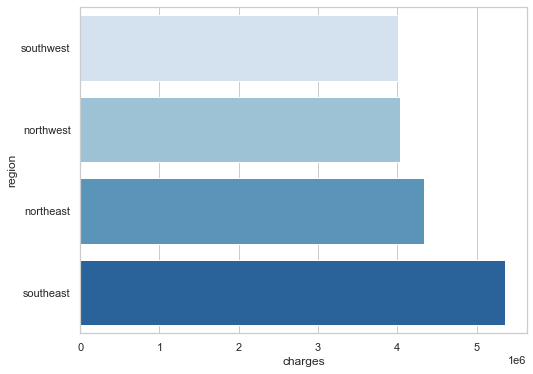

In [14]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

PS : Donc les charges ou frais médicaux les plus élevés se trouvent dans la région Southeast et les plus bas dans la région Southwest.

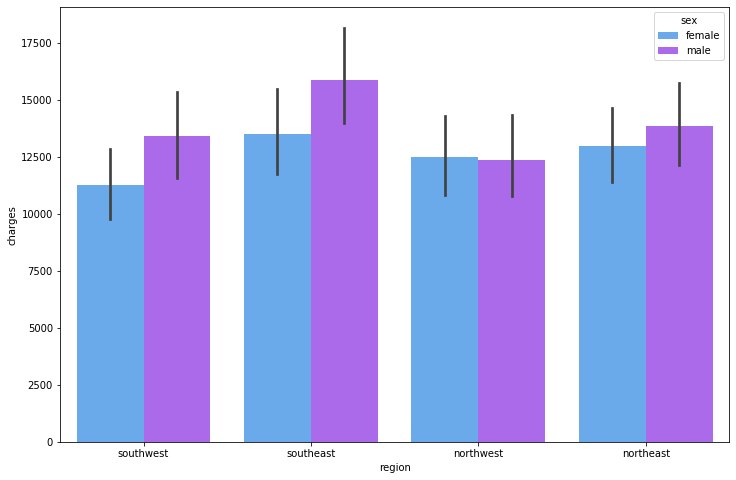

In [19]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

PS : Variation des frais medicaux en fonction du sex et des régions

#### 7. Matrice de corrélation entre les données

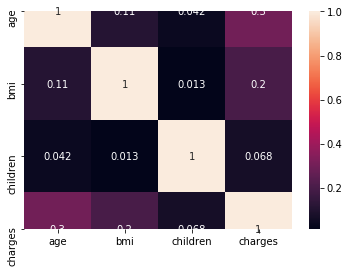

In [21]:
sns.heatmap(df.corr(),annot=True)


*PS1 : d'aprés la matrice de corrélation :
- il est clair que quelques attributs seulement (3 : age, bmi, childre) sont pertinents car les valeurs sont significatives (ont un sens). 
- pour les 3 autres attributs (sex, smoker, region) leurs valeurs ne signifient rien et peuvent fausser les résultats de l'apprentissage c'est pour cette raison qu'ils n'apparaissent pas dans la matrice de corrélation. mais meme si on prend tous les attributs pour faire l'aprentissage l'erreur reste faible.

*PS2 : D'apres les valeurs et couleurs de la derniere ligne et la derniere colonne de la matrice : 
- l'attribut "age",  a la plus forte corrélation avec l'attribut target fetal_health (0.3).
- l'attributl "children", a la plus faible corrélation avec l'attribut target fetal_health (0.068).